In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Added for better visualizations

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.7233 - mae: 2.0968 - val_loss: 4.0128 - val_mae: 1.7349
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.6280 - mae: 1.6431 - val_loss: 2.6494 - val_mae: 1.3609
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.3726 - mae: 1.2753 - val_loss: 1.8082 - val_mae: 1.0595
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6286 - mae: 0.9951 - val_loss: 1.2785 - val_mae: 0.8322
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1808 - mae: 0.7924 - val_loss: 0.9547 - val_mae: 0.6824
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8668 - mae: 0.6582 - val_loss: 0.7699 - val_mae: 0.6031
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7003 - mae: 0.5863 - val_loss: 0.6683 - val_mae: 0.5691
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6052 - mae: 0.5512 - val_loss: 0.6186 - val_mae: 0.5578
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

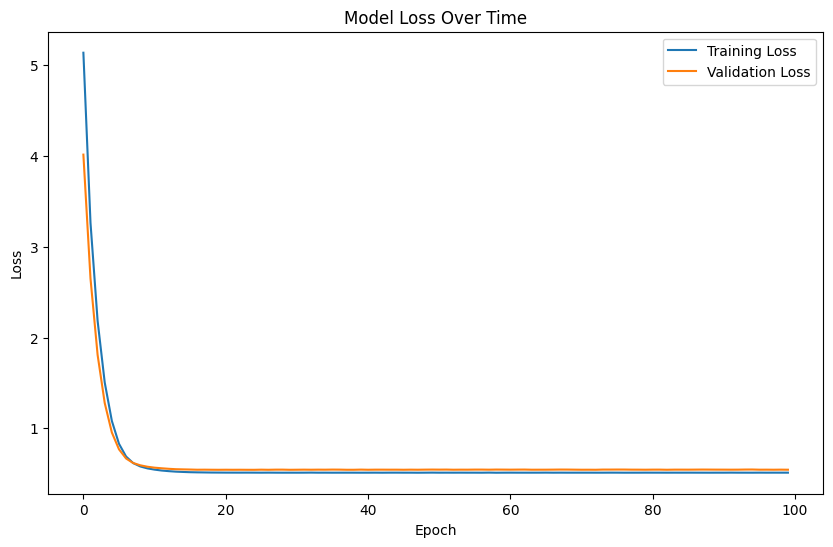

In [2]:
# Modern implementation of Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and compile the model
model = Sequential([
    Dense(1, input_shape=(8,))
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


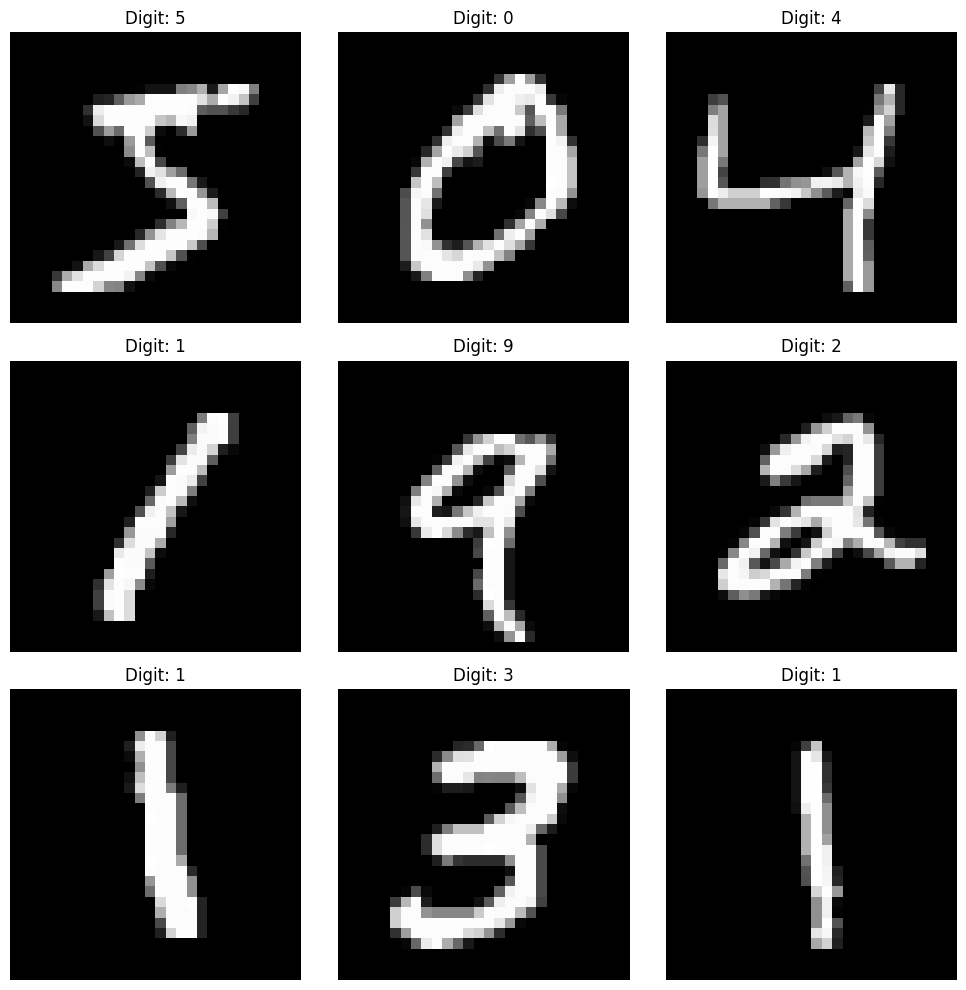

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8315 - loss: 0.5472 - val_accuracy: 0.9667 - val_loss: 0.1010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9605 - loss: 0.1318 - val_accuracy: 0.9752 - val_loss: 0.0787
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9738 - loss: 0.0850 - val_accuracy: 0.9781 - val_loss: 0.0695
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9787 - loss: 0.0693 - val_accuracy: 0.9803 - val_loss: 0.0663
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.9802 - val_loss: 0.0700
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9842 - loss: 0.0483 - val_accuracy: 0.9823 - val_loss: 0.0624
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9814 - val_loss: 0.0678
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9869 - loss: 0.0389 - val_a

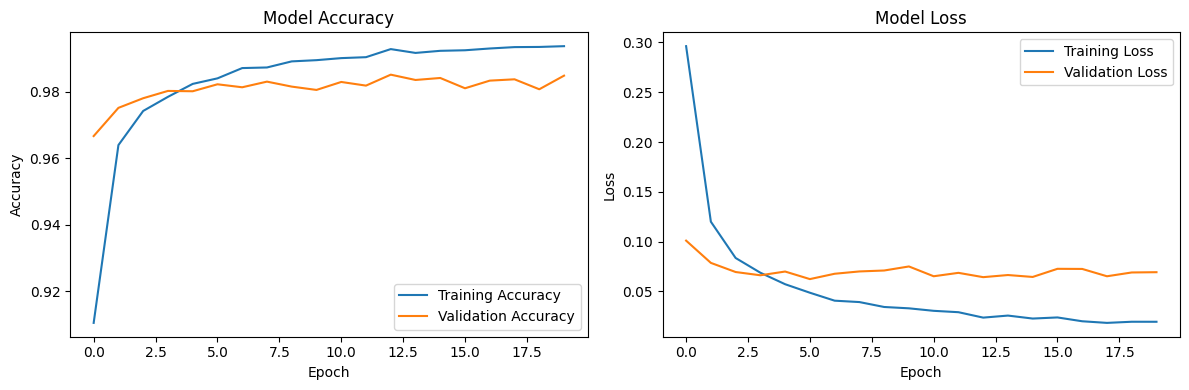

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Preprocess the data
# Reshape and normalize
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create improved model with dropout for better regularization
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train model
model = create_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()